# Load packages {-}

In [1]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import solve
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 3] #set custom figure size

# Import and define data {-}

In [2]:
Amat = np.array([
    [22.13831203, 0.16279204, 0.02353879, 0.02507880,-0.02243145,-0.02951967,-0.02401863],
    [0.16279204, 29.41831006, 0.02191543,-0.06341569, 0.02192010, 0.03284020, 0.03014052],
    [0.02353879,  0.02191543, 1.60947260,-0.01788177, 0.07075279, 0.03659182, 0.06105488],
    [0.02507880, -0.06341569,-0.01788177, 9.36187184,-0.07751218, 0.00541094,-0.10660903],
    [-0.02243145, 0.02192010, 0.07075279,-0.07751218, 0.71033323, 0.10958126, 0.12061597],
    [-0.02951967, 0.03284020, 0.03659182, 0.00541094, 0.10958126, 8.38326265, 0.06673979],
    [-0.02401863, 0.03014052, 0.06105488,-0.10660903, 0.12061597, 0.06673979, 1.15733569]])

Bmat = np.array([
    [-0.03423002, 0.09822473,-0.00832308,-0.02524951,-0.00015116, 0.05321264, 0.01834117],
    [ 0.09822473,-0.51929354,-0.02050445, 0.10769768,-0.02394699,-0.04550922,-0.02907560],
    [-0.00832308,-0.02050445,-0.11285991, 0.04843759,-0.06732213,-0.08106876,-0.13042524],
    [-0.02524951, 0.10769768, 0.04843759,-0.10760461, 0.09008724, 0.05284246, 0.10728227],
    [-0.00015116,-0.02394699,-0.06732213, 0.09008724,-0.07596617,-0.02290627,-0.12421902],
    [ 0.05321264,-0.04550922,-0.08106876, 0.05284246,-0.02290627,-0.07399581,-0.07509467],
    [ 0.01834117,-0.02907560,-0.13042524, 0.10728227,-0.12421902,-0.07509467,-0.16777868]])

yvec = np.array([-0.05677315,-0.00902581, 0.16002152, 0.07001784, 0.67801388,-0.10904168, 0.90505180])

E = np.block([[Amat,Bmat],[Bmat,Amat]])

S = np.block([[np.identity(7),np.zeros((7,7))],[np.zeros((7,7)),-np.identity(7)]])

z = np.concatenate((yvec,-yvec),axis=None)

# Question a {-}
Below a function is written to compute the condition number of a matrix under the max-norm.

In [3]:
def max_norm_cond(M):
    M_inv = inv(M)
    max_norm = max(sum(abs(M)))
    inv_max_norm = max(sum(abs(M_inv)))
    
    return max_norm*inv_max_norm  

Below the condition number is calculated for the matrix <b>E</b> − $\omega$<b>S</b> for three frequencies, $\omega$ = {1.300, 1.607, 3.000}, using the above defined function. 

In [4]:
#calculate condition numbers for ωs
ws = np.array([1.300,1.607,2.700])

cond_nums = [max_norm_cond(E-w*S) for w in ws]

print('The condition numbers for the E-wS matrix using the three frequencies are\n'+ str(cond_nums)) 

The condition numbers for the E-wS matrix using the three frequencies are
[303.0741906688339, 327825.2278438225, 35.55204847098013]


In the matrix equation (<b>E</b>-$\omega$<b>S</b>)<b>x</b> = <b>z</b>, <b>z</b> is given with 8 significant digits. The number of significant digits in the output <b>x</b> can be approximated as the number of significant digits in the input <b>z</b> minus log of the condition number assuming everything else is exact. Below the number of signficiant digits of <b>x</b> for the three different values of $\omega$ are computed.

In [5]:
#how many significant digits in x?
sign_digits = []
for cond_num in cond_nums:
    sign_digits.append(8-np.log10(cond_num)) #z is given with 8 significant digits

print('The number of significant digits to be guaranteed in x for the three frequencies '+str(ws)+' are\n'+str(sign_digits)+' respectively.')   

The number of significant digits to be guaranteed in x for the three frequencies [1.3   1.607 2.7  ] are
[5.518451045906735, 2.4843576282768707, 6.449135370630066] respectively.


# Question b {-}

Below are calculated the upper bounds on relative forward error in max-norm of <b>x</b> for the three frequencies. $\delta\omega=\frac{1}{2}\cdot 10^{-3}$ is the change in frequency being the perturbation.

In [6]:
#calculate bounds for ωs
dw = (1/2)*10**(-3)

bounds = []
for w in ws:
    cond = max_norm_cond(E-w*S) #compute condition number
    dwS_norm = max(sum(abs(dw*S))) #compute max-norm for dwS matrix
    EwS_norm = max(sum(abs(E-w*S))) #compute max-norm for E-wS matrix
    
    bounds.append(cond*(dwS_norm/EwS_norm))

print('The bounds on relative forward error in max-norm of x for the three frequencies are\n'+str(bounds)+' respectively.')

The bounds on relative forward error in max-norm of x for the three frequencies are
[0.004751036527331959, 5.090045024626281, 0.0005338853054581691] respectively.


The number of significant digits in <b>x</b> can be computed as minus the log of the relative forward error which was just computed above. For the three frequencies this guarantees 2, 0 and 3 significant digits in <b>x</b> respectively. 

# Question c {-}
Below a function is written to perform LU factorization on a square matrix. 

In [7]:
#LU factorization
def lu_factorize(M):
    n = np.shape(M)[0]
    L = np.identity(n)
    U = np.copy(M).astype('float64')
    
    for i in range(n): #loop over rows in input matrix
        k = U[i+1:,i]/U[i, i] #compute row multiple(s) to subtract by dividing element(s) by pivot
        L[i+1:, i] = k #insert multiple(s) to create lower triangular matrix
        U[i+1:] -= k[:, np.newaxis]*U[i] #subtract multiple(s) of rows to eliminate subdiagonals
        
    return L, U

Below is written a function to take the lower triangular output matrix from the above function along with a vector and return a solution vector to the linear matrix equation.

In [8]:
#forward substitution
def forward_sub(L, b):
    n = np.shape(L)[0]
    y = np.zeros(n) #initialize solution vector as zeros
    
    y[0] = b[0]/L[0,0] #use first row of L to give first element of y
    for i in range(1,n):
        y[i] = (b[i]-np.dot(L[i,:i], y[:i]))/L[i,i] #perform forward substitution row-wise from top
    
    return y  

Below is written a function to take the upper triangular output matrix from the first function along with a vector and return the solution vector to the linear matrix equation. 

In [9]:
#back substitution
def back_sub(U, y):
    n = np.shape(U)[0]
    x = np.zeros(n) #initialize solution vector as zeros
    
    x[-1] = y[-1]/U[-1,-1] #use last row of U to give last element of x
    for i in range(n-2,-1,-1):
        x[i] = (y[i]-np.dot(U[i,i:], x[i:]))/U[i,i] #perform back substitution row-wise from bottom
    
    return x

Below the functions are tested together against Numpy's linear algebra library to confirm that they work.

In [10]:
#test if works
A = np.array([[2,1,1], [4,1,4], [-6,-5,3]])
b = np.array([4,11,4])

#solve using above functions
L, U = lu_factorize(A)
y = forward_sub(L, b)
x = back_sub(U, y)

#solve using numpy's linear algebra library (library loaded in first cell)
np_x = solve(A, b)

#compare solutions
print(x) == print(np_x) 

[-4.  7.  5.]
[-4.  7.  5.]


True

# Question d {-}
Below a function is defined to compute the polarizability $\alpha$ using the three functions defined in question c.

In [11]:
#define polarizability function
def solve_alpha(z,M):
    L,U = lu_factorize(M)
    y = forward_sub(L,z)
    x = back_sub(U,y)
    a = z@x
    
    return a

Below the polarizabilities due to the perturbation in the frequencies are calculated and shown in a table. 

In [12]:
#make table of frequencies and polarizabilities
dw = (1/2)*10**(-3) #perturbation in frequencies
ws = np.array([1.300, 1.607, 2.700]) #list of unperturbed frequencies

alphas = [] #list of unperturbed polarizabilities
for w in (ws):
    M = E-w*S
    alphas.append(solve_alpha(z,M))

pert_ws = [] #list of perturbed frequencies
for w in ws:
    pert_ws.append(w+dw)
    pert_ws.append(w-dw)

pert_alphas = [] #list of perturbed polarizabilities
for w in (pert_ws):
    M = E-w*S
    pert_alphas.append(solve_alpha(z,M))
    
freqs_and_alphas = pd.DataFrame(np.array([(pert_ws),pert_alphas]).T, columns=['Frequency', 'Polarizability'])
freqs_and_alphas

,Frequency,Polarizability
0,1.3005,-4.858572
1,1.2995,-4.893434
2,1.6075,-91.093531
3,1.6065,151.096727
4,2.7005,-0.375769
5,2.6995,-0.376118


The error-bound calculated in question b is the correct one to understand the variation of the calculated polarizabilities due to the perturbation. The perturbation was not yet introduced in question a. 
Below the relative forward errors in the polarizabilities due to the perturbation are calculated. 

In [13]:
#calculate relative forward errors 
errors = []
for i in range(len(ws)):
    errors.append((alphas[i]-pert_alphas[2*i])/alphas[i])

print('The relative forward errors in alpha, and thereby x, caused by the perturbation in the omegas are\n'+(str(errors))+'\nfor the three omegas respectively.')

The relative forward errors in alpha, and thereby x, caused by the perturbation in the omegas are
[0.003563590897527208, 0.7905706191573287, 0.00046435429849739503]
for the three omegas respectively.


The relative errors fall within the bounds calculated in question b. 

# Question e {-}
Below the polarizabilities for 1000 evenly spaced frequencies in the interval [1.2,4] are computed and plotted. 

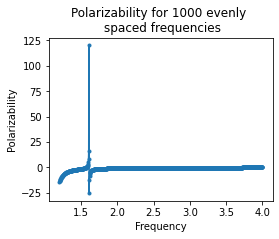

In [14]:
#polarizability for 1000 evenly spaced frequencies
new_ws = np.linspace(1.2,4,1000)
new_alphas = []

for w in new_ws:
    M = E-w*S
    new_alphas.append(solve_alpha(z,M))
    
plt.figure()
plt.plot(new_ws, new_alphas, '.-')
plt.title('Polarizability for 1000 evenly \n spaced frequencies')
plt.xlabel('Frequency')
plt.ylabel('Polarizability')
plt.show()

Around $\omega$=1.60686978 the matrix <b>E</b>-$\omega$<b>S</b> becomes singular which causes the polarizability to blow up (go to infinity).  

# Question f {-}

Below a routine is implemented to compute the QR decomposition of a matrix using the Householder method.

In [15]:
def euc_norm(x): #compute the euclidean norm of vector x
    return np.sqrt(np.sum(x**2))

def find_v(a,i): #compute the Householder vector for the column vector
    e1 = np.zeros_like(a)
    e1[i] = 1
    v = a+np.sign(a[i])*euc_norm(a)*e1
    return v

def householder(v): #compute the Householder transformation matrix
    n = len(v)
    I = np.identity(n)
    H = I-(2/(v.T@v))*(np.outer(v,v.T))
    return H

def QR(M): #perform the Householder transformation
    Hs = []
    R = np.copy(M)
    for i in range(np.shape(M)[1]):        
        a = np.copy(R[:,i])
        a[:i] = 0
        v = find_v(a,i)
        H = householder(v)
        Hs.append(H)
        new_R = H@R
        R = np.copy(new_R)
    
    Q = np.linalg.multi_dot(Hs)
    
    return R, Q

Below it is confirmed that the routine works using the test matrix.

In [16]:
A_test = np.array([[1,0,0],[0,1,0],[0,0,1],[-1,1,0],[-1,0,1],[0,-1,1]])
b_test = np.array([1237,1941,2417,711,1177,475])

R, Q = QR(A_test)
print(np.allclose(Q.T@Q,Q@Q.T)) #check if Q^TQ=QQ^T
print(np.allclose(Q.T@Q,np.identity(len(Q)))) #check if Q^TQ=I
print(np.allclose(Q@R,A_test)) #check if QR=A_test

True
True
True


Below a rutine is implemented to compute a linear least squares fitting using the above QR decomposition and the back substitution from question c. 
The upper, non-zero, half of <b>R</b> and the upper half of the test vector are used to compute the approximate solution for <b>x</b>. 

In [17]:
def least_squares(A,b):
    R, Q = QR(A)
    d = (Q.T@b)[:np.shape(A)[1]]
    upper_R = R[:np.shape(A)[1]]
    x = back_sub(upper_R, d)
    return x

Below it is confirmed that the rutine works using the test matrix and vector to get the same solution vector as in the book.

In [18]:
least_squares(A_test, b_test)

array([1236., 1943., 2416.])

# Question g {-}
I choose $\omega_p$ to be 1.55. With this value we are close enough to the singularity to see interesting behaviour but not so close that is has yet blown up. 
Below the coefficients for the polynomial approximation of $\alpha$ (called P) are computed for 1000 frequencies in the interval [1.2,1.55] and n=4.

In [19]:
#choose wp to be 1.55
ws = np.linspace(1.2,1.55,1000) #1000 evenly spaced ws between 1.2 and 1.55
alphas = []
for w in ws:
    M = E-w*S
    alphas.append(solve_alpha(z,M)) #true values of polarizability
    
#construct matrix of omegas for n=4
n = 4
P_4 = np.zeros((len(ws),n+1))
P_4[:,0] = 1
for i in range(1,n+1):
    P_4[:,i] = ws**(2*i)

#find least squares fitting of coefficients for n=4
coeffs_4 = least_squares(P_4, alphas)
print('The coefficients for the polynomial approximation for n=4 are\n'+str(coeffs_4))

The coefficients for the polynomial approximation for n=4 are
[-1300.17935877  2538.20097172 -1862.99532534   607.04027328
   -73.95216346]


Below the coefficients are computed for the same frequency range now for n=6. 

In [20]:
#construct matrix of omegas for n=6
n = 6
P_6 = np.zeros((len(ws),n+1))
P_6[:,0] = 1
for i in range(1,n+1):
    P_6[:,i] = ws**(2*i)

#find least squares fitting of coefficients for n=4
coeffs_6 = least_squares(P_6, alphas)
print('The coefficients for the polynomial approximation for n=6 are\n'+str(coeffs_6))

The coefficients for the polynomial approximation for n=6 are
[-19667.09643667  59538.92971858 -75011.72450731  50295.1301214
 -18918.28129246   3783.7175888    -314.27885222]


Below the relative error in the polynomial approximation is plotted (on a log scale) for n=4 and n=6. 

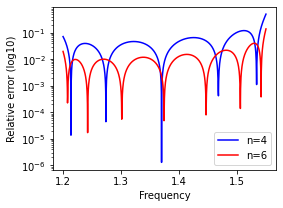

In [21]:
#compare relative error of approximations
rel_error_4 = np.array([abs(((coeffs_4@P_4[i])-alphas[i])/alphas[i]) for i in range(len(alphas))])
rel_error_6 = np.array([abs(((coeffs_6@P_6[i])-alphas[i])/alphas[i]) for i in range(len(alphas))])

plt.figure()
plt.plot(ws, rel_error_4, 'b', label='n=4')
plt.plot(ws, rel_error_6, 'r', label='n=6')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Relative error (log10)')
plt.legend()
plt.show()

The number of significant digits that each approximation yields can be computed as minus the log of the relative error computed above. 
Below the number of significant digits for each frequency for n=4 and n=6 are calculated and plotted. 

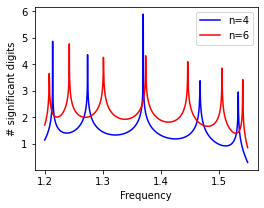

In [22]:
digits_4 = -np.log10(rel_error_4)
digits_6 = -np.log10(rel_error_6)

plt.figure()
plt.plot(ws, digits_4, 'b', label='n=4')
plt.plot(ws, digits_6, 'r', label='n=6')
plt.xlabel('Frequency')
plt.ylabel('# significant digits')
plt.legend()
plt.show()

# Question h {-}
Below the polarizability for frequencies in the range [1.2,4] are computed. The expression for the rational approximating function is rewritten as a linear approximation following the approach in the hint. From the expression of the linear approximation a Vandermonde matrix is contructed and used as input to the least squares function from question f to compute the coefficients of the linear approximation. In this first part, the n of the approximation is 2. 

In [23]:
#define ws in range [1.2,4]
ws = np.linspace(1.2,4,1000) #1000 evenly spaced ws between 1.2 and 4
alphas = []
for w in ws:
    M = E-w*S
    alphas.append(solve_alpha(z,M)) #true values of polarizability
alphas = np.array(alphas)

#construct Vandermonde matrix
def vandermonde(n, ws):
    matrix = np.zeros((len(ws),2*n+1))
    matrix[:,0] = 1
    for i in range(1,n+1):
        matrix[:,i] = ws**(i)
    for i in range(n+1,2*n+1):
        matrix[:,i] = -alphas*ws**(i-n)  
    return matrix

# find least squares fitting of rational coefficients for n=2
Q2_matrix = vandermonde(2, ws)
Q2_coeffs = least_squares(Q2_matrix, alphas)
print('The coefficients for the linear approximation for n=2 are\n'+str(Q2_coeffs))

The coefficients for the linear approximation for n=2 are
[ 0.73245626 -0.56503326  0.06227827 -1.48274436  0.53544673]


Using the coefficients from the least squares solution to the linear approximation, the rational approximated values of the polarizability (Q-values) are computed. 

In [24]:
#compute Q(w) from coefficients
def rational_approx(n, coeffs, ws):
    values = []
    for w in ws:
        top = [] #numerator in Q(w) expression
        bottom = [1] #denominator in Q(w) expression
        for j in range(n+1):
            top.append(coeffs[j]*w**j)
        for j in range(1,n+1):
            bottom.append(coeffs[n+j]*w**j)
        values.append(sum(top)/sum(bottom))
    
    return np.array(values)

Q2 = rational_approx(2, Q2_coeffs, ws)

Below the relative errors in the approximated Q-values compared to the $\alpha$-values are plotted.

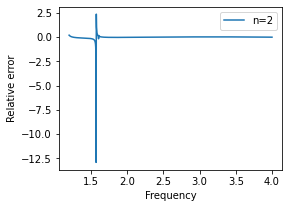

In [25]:
#plot relative error of Q2 approximation
plt.figure()
plt.plot(ws, (Q2-alphas)/alphas, label='n=2')
plt.xlabel('Frequency')
plt.ylabel('Relative error')
plt.legend()
plt.show()

Below the Q approximation is repeated for n=4. 

In [26]:
# find least squares fitting of rational coefficients for n=4
Q4_matrix = vandermonde(4, ws)
Q4_coeffs = least_squares(Q4_matrix, alphas)
print('The coefficients for the rational approximation for n=4 are\n'+str(Q4_coeffs))

The coefficients for the rational approximation for n=4 are
[ 1.71402611 -2.84873698  1.0675302   0.04153459 -0.00592252 -1.67120509
 -0.17904712  1.37719605 -0.53492096]


Below the values of Q for n=4 are computed and the relative error of the approximation is plotted. 

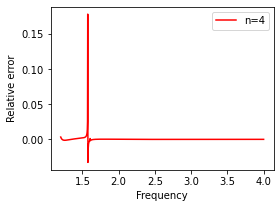

In [27]:
#Q values from coefficients
Q4 = rational_approx(4, Q4_coeffs, ws)

#plot relative error of Q4 approximation
plt.figure()
plt.plot(ws, (Q4-alphas)/alphas, 'r', label='n=4')
plt.xlabel('Frequency')
plt.ylabel('Relative error')
plt.legend()
plt.show()

Below the relative errors of the two approximations (n=2 and n=4) are compared quantitatively on a plot. 

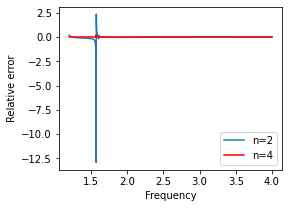

In [28]:
#compare approximation for n=2 and n=4
plt.figure()
plt.plot(ws, (Q2-alphas)/alphas, label='n=2')
plt.plot(ws, (Q4-alphas)/alphas, 'r', label='n=4')
plt.xlabel('Frequency')
plt.ylabel('Relative error')
plt.legend()
plt.show()

Below the values of $\alpha$ in the extended $\omega$-interval [-4,4] are considered. 

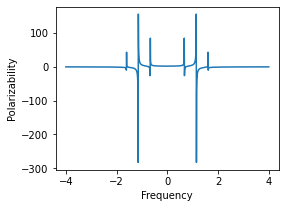

In [29]:
#consider extended range of ws
extended_ws = np.linspace(-4,4,1000) #1000 evenly spaced ws between -4 and 4

alphas = [] #polarizabilities in the extended range
for w in extended_ws:
    M = E-w*S
    alphas.append(solve_alpha(z,M)) #true values of polarizability
alphas = np.array(alphas)

plt.figure()
plt.plot(extended_ws, alphas)
plt.xlabel('Frequency')
plt.ylabel('Polarizability')
plt.show()

To accurately approximate the extended range of frequencies, n is set to 8 in the rational approximating function. 
Below the Vandermonde matrix for n=8 is constructed and the coefficients of the approximation found using the least squares function. 

In [30]:
#construct Vandermonde for n=8
Q8_matrix = vandermonde(8, extended_ws)
Q8_coeffs = least_squares(Q8_matrix, alphas)
print('The coefficients for the rational approximation for n=8 are\n'+str(Q8_coeffs))

The coefficients for the rational approximation for n=8 are
[ 1.98067170e+00  2.40149194e-12 -4.48783549e+00 -5.35045154e-12
  1.54527443e+00  1.77052396e-12 -2.23742173e-02 -4.14805459e-15
  2.58988949e-06  1.19073491e-12 -3.38469134e+00 -4.00528418e-12
  2.89286919e+00  3.37387725e-12 -6.93672016e-01 -7.74168977e-13
  8.86203452e-03]


Below the values of Q for n=8 are computed and plotted to compare with the shape of the extended range plotted above.  

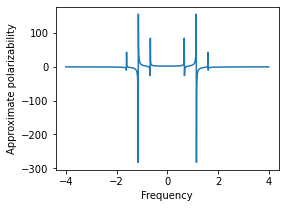

In [31]:
#Q values from coefficients
Q = rational_approx(8, Q8_coeffs, extended_ws)

plt.figure()
plt.plot(extended_ws, Q)
plt.xlabel('Frequency')
plt.ylabel('Approximate polarizability')
plt.show()

Below the relative errors of the approximation for n=8 for the extended frequency range are plotted.

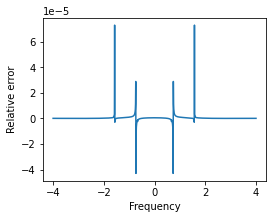

In [32]:
#plot relative error
plt.figure()
plt.plot(extended_ws, (Q-alphas)/alphas)
plt.xlabel('Frequency')
plt.ylabel('Relative error')
plt.show()